In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import folium



In [ ]:
foreign_faccent = pd.read_csv('원래외노지원센터.csv', encoding = 'euc-kr')
foreign_faccent.head()

,순번,유형,기관명,소재지,연락처
0,1,거점센터,(사)지구촌사랑나눔,서울 구로구,02-6900-8000
1,2,거점센터,신한대학교 산학협력단,경기 의정부시,031-838-9111
2,3,거점센터,인제대학교,경남 김해시,055-338-2727
3,4,거점센터,사회복지법인 통도사자비원,경남 창원시,055-253-5270
4,5,거점센터,인천경총 및 한국노총 공동수급체,인천 남동구,032-431-4545


In [ ]:
foreign_faccent = pd.read_csv('외노지원센터.csv', encoding = 'euc-kr')
foreign_faccent.head()

,순번,유형,기관명,소재지,연락처,lat,lng
0,1,거점센터,(사)지구촌사랑나눔,서울 구로구,02-6900-8000,37.478752,126.896011
1,2,거점센터,신한대학교 산학협력단,경기 의정부시,031-838-9111,37.709416,127.043019
2,3,거점센터,인제대학교,경남 김해시,055-338-2727,35.248638,128.902946
3,4,거점센터,사회복지법인 통도사자비원,경남 창원시,055-253-5270,35.196265,128.566822
4,5,거점센터,인천경총 및 한국노총 공동수급체,인천 남동구,032-431-4545,37.454099,126.697833


In [ ]:
slicing = foreign_faccent[['순번','lat','lng']]
slicing.head()


,순번,lat,lng
0,1,37.478752,126.896011
1,2,37.709416,127.043019
2,3,35.248638,128.902946
3,4,35.196265,128.566822
4,5,37.454099,126.697833


In [ ]:
from folium import Marker

center = [37.541, 126.986]#센터 바꾸기
m = folium.Map(location=center, zoom_start=6)

for i in slicing.index:

    folium.Marker(
        location = slicing.loc[i, ['lat', 'lng']],
        icon = folium.Icon(color='blue', icon='star') # Icon Marker 지정
    ).add_to(m)

for i in slicing.index:
    folium.Circle(
        location = slicing.loc[i, ['lat', 'lng']],
        tooltip = slicing.loc[i, '순번'],
        radius = 200,
        
    ).add_to(m)
m

In [ ]:
count = foreign_faccent.groupby('지역').value_counts()
count

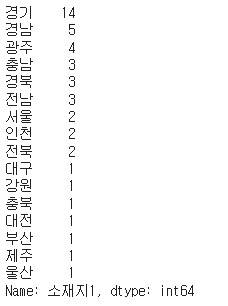

sjj = 위에꺼를 dataframe으로 저장7

In [ ]:
import json

# 개수 불러오기
state_data = sjj()
geo_data = '한국지도.json'

#서울중심 map
m = folium.Map([37.541,126.986], zoom_start = 7)


folium.Choropleth(
    geo_data=geo_data, # 경계선 좌표값이 담긴 데이터
    data=state_data, # Series or DataFrame 넣으면 된다
    columns=['지역','개수'], # DataFrame의 어떤 columns을 넣을지
    fill_color = 'PuBu',
    key_on='feature.id', # id 값을 가져오겠다; feature.id : feature 붙여줘야 함 (folium의 정해진 형식)

).add_to(m)
m